In [1]:
import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork
from FlowStability import SparseClustering, FlowIntegralClustering, run_multi_louvain, avg_norm_var_information
import pickle

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotx

from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
from scipy.sparse.linalg import eigsh


from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.image as mpimg

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [2]:
selected_lamdas = np.logspace(-5,0,10)

In [3]:
net_heat0 = ContTempNetwork.load('agents_SBM_net0_b')
net_heat1 = ContTempNetwork.load('agents_SBM_net1_b')
net_heat2 = ContTempNetwork.load('agents_SBM_net2_b')
net_heat3 = ContTempNetwork.load('agents_SBM_net3_b')

In [4]:
net_heat0.times

Index([0.10942640895032588, 0.24641347620593013,  0.2685783453713369,
        0.3216492021432774,  0.3978760511481624,   0.407036748989315,
        0.6130219256139597,   0.692296623447715,  0.7795930912170469,
        0.7849942038050244,
       ...
         298.5169592476667,   298.6435131075454,   298.8379166303429,
         298.8443621144988,  299.12575158436783,  299.22041756188713,
         299.2453884861747,   299.2614373033902,  299.32037648419526,
         299.3980693646223],
      dtype='float64', name='times', length=4382)

In [5]:
# Example matrices for demonstration
matrix1_0 = net_heat0.compute_static_adjacency_matrix(start_time=0, end_time=150).toarray()
matrix2_0 = net_heat0.compute_static_adjacency_matrix(start_time=150, end_time=300).toarray()

# Example matrices for demonstration
matrix1_1 = net_heat1.compute_static_adjacency_matrix(start_time=0, end_time=100).toarray()
matrix2_1 = net_heat1.compute_static_adjacency_matrix(start_time=100, end_time=200).toarray()
matrix3_1 = net_heat1.compute_static_adjacency_matrix(start_time=200, end_time=300).toarray()

# Example matrices for demonstration
matrix1_2 = net_heat2.compute_static_adjacency_matrix(start_time=0, end_time=100).toarray()
matrix2_2 = net_heat2.compute_static_adjacency_matrix(start_time=100, end_time=200).toarray()
matrix3_2 = net_heat2.compute_static_adjacency_matrix(start_time=200, end_time=300).toarray()

# Example matrices for demonstration
matrix1_3 = net_heat3.compute_static_adjacency_matrix(start_time=0, end_time=100).toarray()
matrix2_3 = net_heat3.compute_static_adjacency_matrix(start_time=100, end_time=200).toarray()
matrix3_3 = net_heat3.compute_static_adjacency_matrix(start_time=200, end_time=300).toarray()

# Define the time intervals for the x-axis
time_intervals_0 = [(0, 150), (150, 300)]
# Define the time intervals for the x-axis
time_intervals_123 = [(0, 100), (100, 200),  (200, 300)]

In [6]:
Conditional_S_selected0 = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/agents_SBM_heat/net0_b/S_rate/S_rate{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected0.append(S_rate['S_rate'][f'{lamda:.11f}'])

Conditional_S_selected_back0 = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/agents_SBM_heat/net0_b/S_rate_back/S_rate{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected_back0.append(S_rate['S_rate'][f'{lamda:.11f}'])

Conditional_S_selected1 = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/agents_SBM_heat/net1_b/S_rate/S_rate{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected1.append(S_rate['S_rate'][f'{lamda:.11f}'])

Conditional_S_selected_back1 = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/agents_SBM_heat/net1_b/S_rate_back/S_rate{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected_back1.append(S_rate['S_rate'][f'{lamda:.11f}'])

Conditional_S_selected2 = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/agents_SBM_heat/net2_b/S_rate/S_rate{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected2.append(S_rate['S_rate'][f'{lamda:.11f}'])

Conditional_S_selected_back2 = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/agents_SBM_heat/net2_b/S_rate_back/S_rate{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected_back2.append(S_rate['S_rate'][f'{lamda:.11f}'])

Conditional_S_selected3 = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/agents_SBM_heat/net3_b/S_rate/S_rate{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected3.append(S_rate['S_rate'][f'{lamda:.11f}'])

Conditional_S_selected_back3 = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/agents_SBM_heat/net3_b/S_rate_back/S_rate{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected_back3.append(S_rate['S_rate'][f'{lamda:.11f}'])

/tmp/ipykernel_2940450/2586703631.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


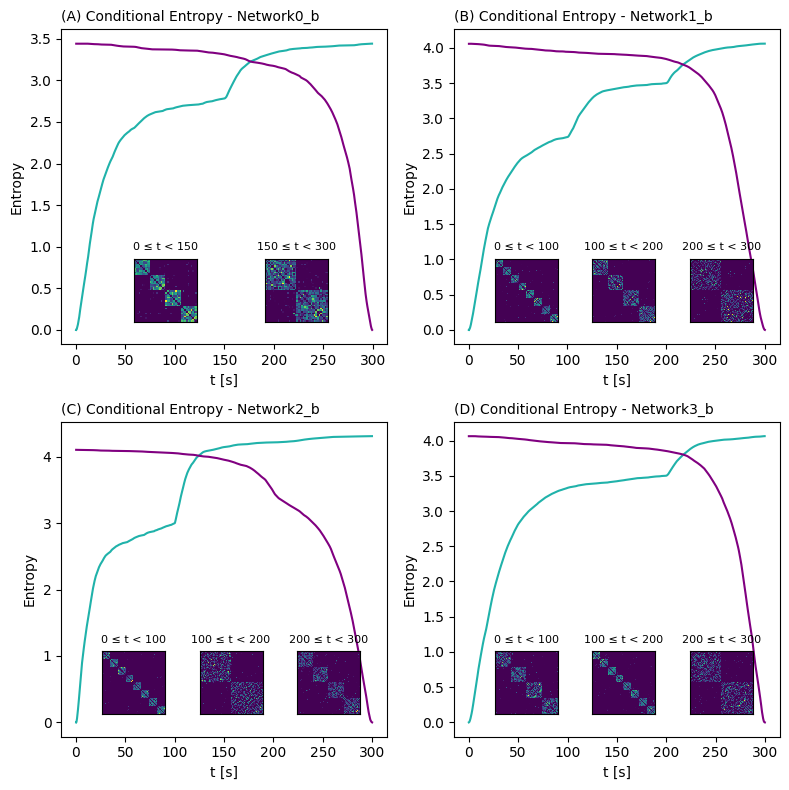

In [7]:
# Start creating the figure
fig = plt.figure(figsize=(8, 8))  # Wider figure for all plots in one row
gs = fig.add_gridspec(2, 2)  # Grid: 1 row, 4 columns

# Column 1: Plot A
ax_a = fig.add_subplot(gs[0, 0])
color_forw = 'lightseagreen'
color_back = 'purple'

index = 6
S = Conditional_S_selected0[index]
S_back = Conditional_S_selected_back0[index]

ax_a.plot(net_heat0.times[:-1], S, color=color_forw, alpha=1)
ax_a.plot(list(net_heat0.times)[:0:-1], S_back, color=color_back, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Entropy")
ax_a.set_title("(A) Conditional Entropy - Network0_b", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_0, matrix2_0]
positions = [0.20, 0.60]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_title(f"{time_intervals_0[i][0]} ≤ t < {time_intervals_0[i][1]}", fontsize=8)


# Column 2: Plot B
ax_a = fig.add_subplot(gs[0, 1])

index = 6
S = Conditional_S_selected1[index]
S_back = Conditional_S_selected_back1[index]

ax_a.plot(net_heat1.times[:-1], S, color=color_forw, alpha=1)
ax_a.plot(list(net_heat1.times)[:0:-1], S_back, color=color_back, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Entropy")
ax_a.set_title("(B) Conditional Entropy - Network1_b", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_1, matrix2_1, matrix3_1]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Column 3: Plot C
ax_a = fig.add_subplot(gs[1, 0])

index = 7
S = Conditional_S_selected2[index]
S_back = Conditional_S_selected_back2[index - 1]

ax_a.plot(net_heat2.times[:-1], S, color=color_forw, alpha=1)
ax_a.plot(list(net_heat2.times)[:0:-1], S_back, color=color_back, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Entropy")
ax_a.set_title("(C) Conditional Entropy - Network2_b", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_2, matrix2_2, matrix3_2]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Column 4: Plot D
ax_a = fig.add_subplot(gs[1, 1])

index = 6
S = Conditional_S_selected3[index]
S_back = Conditional_S_selected_back3[index]

ax_a.plot(net_heat3.times[:-1], S, color=color_forw, alpha=1)
ax_a.plot(list(net_heat3.times)[:0:-1], S_back, color=color_back, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Entropy")
ax_a.set_title("(D) Conditional Entropy - Network3_b", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_3, matrix2_3, matrix3_3]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Adjust layout and display
plt.tight_layout()
#plt.savefig('/home/b/skoove/Desktop/growing300/motifs_fig_b.eps', format='eps', dpi=300)
plt.show()

# Figures for Slides

/tmp/ipykernel_2940450/3186161162.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


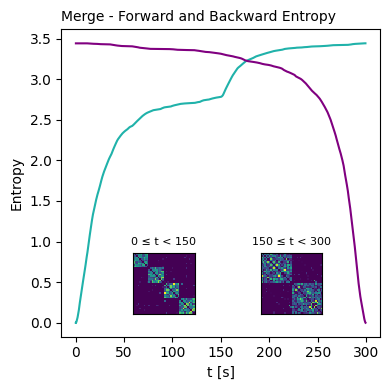

In [8]:
# Column 1: Plot A
fig = plt.figure(figsize=(4, 4))  # Wider figure for all plots in one row
gs = fig.add_gridspec(1, 1)  # Grid: 1 row, 4 columns

ax_a = fig.add_subplot(gs[0, 0])
index = 6
S = Conditional_S_selected0[index]
S_back = Conditional_S_selected_back0[index]

ax_a.plot(net_heat0.times[:-1], S, color=color_forw, alpha=1)
ax_a.plot(list(net_heat0.times)[:0:-1], S_back, color=color_back, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Entropy")
ax_a.set_title("Merge - Forward and Backward Entropy", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_0, matrix2_0]
positions = [0.20, 0.60]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_title(f"{time_intervals_0[i][0]} ≤ t < {time_intervals_0[i][1]}", fontsize=8)

plt.tight_layout()
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/merge_b_slides.png', format='png', dpi=300)

/tmp/ipykernel_2940450/1298225429.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


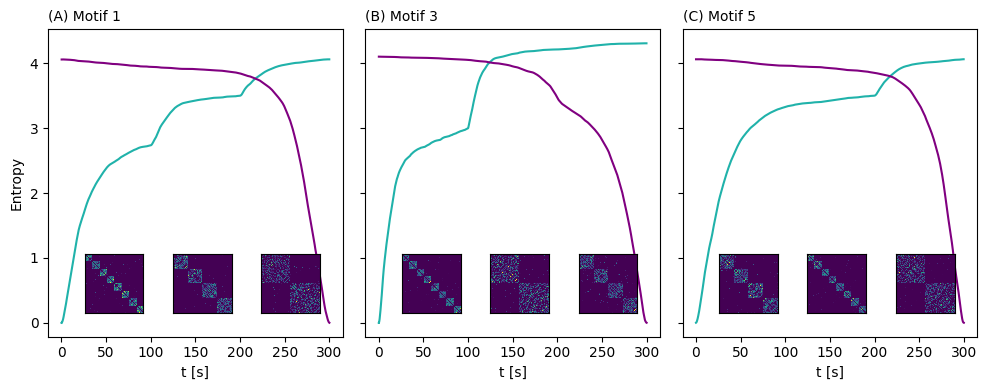

In [9]:
# Start creating the figure
fig = plt.figure(figsize=(10, 4))  # Wider figure for all plots in one row
gs = fig.add_gridspec(1, 3)  # Grid: 1 row, 4 columns

color_forw = 'lightseagreen'
color_back = 'purple'


# Plot1: Motif1
ax_a = fig.add_subplot(gs[0, 0])

index = 6
S = Conditional_S_selected1[index]
S_back = Conditional_S_selected_back1[index]

ax_a.plot(net_heat1.times[:-1], S, color=color_forw, alpha=1)
ax_a.plot(list(net_heat1.times)[:0:-1], S_back, color=color_back, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Entropy")
ax_a.set_title("(A) Motif 1", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_1, matrix2_1, matrix3_1]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    #inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Plot2: Motif 3
ax_a = fig.add_subplot(gs[0, 1], sharey=ax_a)
plt.setp(ax_a.get_yticklabels(), visible=False)

index = 7
S = Conditional_S_selected2[index]
S_back = Conditional_S_selected_back2[index - 1]

ax_a.plot(net_heat2.times[:-1], S, color=color_forw, alpha=1)
ax_a.plot(list(net_heat2.times)[:0:-1], S_back, color=color_back, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_title("(B) Motif 3", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_2, matrix2_2, matrix3_2]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    #inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Plot3: Motif 5
ax_a = fig.add_subplot(gs[0, 2], sharey = ax_a)
plt.setp(ax_a.get_yticklabels(), visible=False)


index = 6
S = Conditional_S_selected3[index]
S_back = Conditional_S_selected_back3[index]

ax_a.plot(net_heat3.times[:-1], S, color=color_forw, alpha=1)
ax_a.plot(list(net_heat3.times)[:0:-1], S_back, color=color_back, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_title("(C) Motif 5", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_3, matrix2_3, matrix3_3]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    #inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Adjust layout and display
plt.tight_layout()
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/motifs_fig_b_slides.png', format='png', dpi=300)
plt.show()

### NetSci 2025 version

/tmp/ipykernel_2940450/3221786342.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


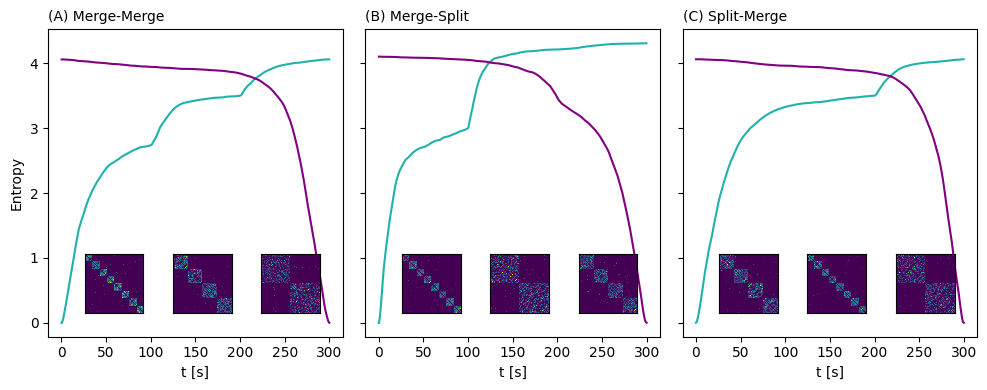

In [11]:
# Start creating the figure
fig = plt.figure(figsize=(10, 4))  # Wider figure for all plots in one row
gs = fig.add_gridspec(1, 3)  # Grid: 1 row, 4 columns

color_forw = 'lightseagreen'
color_back = 'purple'


# Plot1: Motif1
ax_a = fig.add_subplot(gs[0, 0])

index = 6
S = Conditional_S_selected1[index]
S_back = Conditional_S_selected_back1[index]

ax_a.plot(net_heat1.times[:-1], S, color=color_forw, alpha=1)
ax_a.plot(list(net_heat1.times)[:0:-1], S_back, color=color_back, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Entropy")
ax_a.set_title("(A) Merge-Merge", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_1, matrix2_1, matrix3_1]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    #inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Plot2: Motif 3
ax_a = fig.add_subplot(gs[0, 1], sharey=ax_a)
plt.setp(ax_a.get_yticklabels(), visible=False)

index = 7
S = Conditional_S_selected2[index]
S_back = Conditional_S_selected_back2[index - 1]

ax_a.plot(net_heat2.times[:-1], S, color=color_forw, alpha=1)
ax_a.plot(list(net_heat2.times)[:0:-1], S_back, color=color_back, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_title("(B) Merge-Split", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_2, matrix2_2, matrix3_2]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    #inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Plot3: Motif 5
ax_a = fig.add_subplot(gs[0, 2], sharey = ax_a)
plt.setp(ax_a.get_yticklabels(), visible=False)


index = 6
S = Conditional_S_selected3[index]
S_back = Conditional_S_selected_back3[index]

ax_a.plot(net_heat3.times[:-1], S, color=color_forw, alpha=1)
ax_a.plot(list(net_heat3.times)[:0:-1], S_back, color=color_back, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_title("(C) Split-Merge", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_3, matrix2_3, matrix3_3]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    #inset_ax.set_title(f"{time_intervals_123[i][0]} ≤ t < {time_intervals_123[i][1]}", fontsize=8)

# Adjust layout and display
plt.tight_layout()
plt.savefig('/home/b/skoove/Desktop/NetSci2025/motifs_fig_b_slides.jpg', format='jpg', dpi=300)
plt.show()